# Sample notebook for using Copernicus Toolbox 

This notebook is an to download ocean model data to d

In [13]:
import xarray as xr
import copernicusmarine
import copernicusmarine as cm
from pprint import pprint
import json
import matplotlib
import ccrs
cm.__version__

ModuleNotFoundError: No module named 'ccrs'

In [3]:
# Download the catalog for the MERCATOR global reanalysis runs
catalogue_001_024 = copernicusmarine.describe(product_id="GLOBAL_ANALYSISFORECAST_PHY_001_024", 
                                              disable_progress_bar=True,
                                              
                                              )

In [4]:
# Create a list of datasets we're interested in
# Filtering for the daily files
# Filtering for "cur" (currents), "so" (salinity) and "theta0" (temperature)
#
# This is horrible, there must be a more elegant pythonic way to do this

# make a dictionary
dataset_list = {}
for dataset in catalogue_001_024.products[0].datasets:
    
    dataset_id = dataset.dataset_id
    if dataset_id.count("P1D")>0:
        print(dataset_id)
        if dataset_id.count("-cur_"):
            dataset_list[dataset_id] = ["uo","vo"]
        if dataset_id.count("-so"):
            dataset_list[dataset_id] = ["so"]
        if dataset_id.count("-thetao"):
            dataset_list[dataset_id] = ["thetao"]
print(dataset_list)

cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m
cmems_mod_glo_phy-so_anfc_0.083deg_P1D-m
cmems_mod_glo_phy-thetao_anfc_0.083deg_P1D-m
cmems_mod_glo_phy-wcur_anfc_0.083deg_P1D-m
cmems_mod_glo_phy_anfc_0.083deg-sst-anomaly_P1D-m
cmems_mod_glo_phy_anfc_0.083deg_P1D-m
{'cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m': ['uo', 'vo'], 'cmems_mod_glo_phy-so_anfc_0.083deg_P1D-m': ['so'], 'cmems_mod_glo_phy-thetao_anfc_0.083deg_P1D-m': ['thetao']}


In [5]:
# Now, Loop through all the datasets of interest, download the individual netCDFs for the subset region
# (in space and time)

# You will need a copernicus account, and need to enter the credentials when you run this cell
# each time you take a subset

# Only need to run this cell once to download the data


# TODO: Figure out how to use an SSH key or other to keep from having to type in credentials


for dataset_id in dataset_list.keys():
    #dataset_id = "cmems_mod_glo_phy_anfc_0.083deg_P1D-m"   # 3D daily
    vars_3d = dataset_list[dataset_id]                  # east vel, north vel, potential temp, salinity

    # cm.subset(
    #     dataset_id=dataset_id,
    #     variables=vars_3d,
    #     minimum_longitude=-70,  # west
    #     maximum_longitude=-65,  # east
    #     minimum_latitude=  30.0,   # south
    #     maximum_latitude=  45.0,   # north
    #     start_datetime="2025-07-01T00:00:00",
    #     end_datetime="2025-07-03T00:00:00",
    #     minimum_depth=0,           # meters (0 = surface)
    #     maximum_depth=1000,         # crop to upper 200 m
    #     output_filename=f"{dataset_id}_subset.nc",
    #     output_directory="copernicus-data",
    #     file_format="netcdf",      # or "zarr"
    #     netcdf_compression_level=4 # optional tradeoff size vs speed
    # )

In [6]:
cur_ds = xr.open_dataset("copernicus-data/cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m_subset.nc")
so_ds = xr.open_dataset("copernicus-data/cmems_mod_glo_phy-so_anfc_0.083deg_P1D-m_subset.nc")
thetao = xr.open_dataset("copernicus-data/cmems_mod_glo_phy-thetao_anfc_0.083deg_P1D-m_subset.nc")

In [7]:
cur_ds

<xarray.Dataset> Size: 9MB
Dimensions:    (time: 3, depth: 35, latitude: 181, longitude: 61)
Coordinates:
  * depth      (depth) float32 140B 0.494 1.541 2.646 ... 643.6 763.3 902.3
  * latitude   (latitude) float32 724B 30.0 30.08 30.17 ... 44.83 44.92 45.0
  * longitude  (longitude) float32 244B -70.0 -69.92 -69.83 ... -65.08 -65.0
  * time       (time) datetime64[ns] 24B 2025-07-01 2025-07-02 2025-07-03
Data variables:
    uo         (time, depth, latitude, longitude) float32 5MB ...
    vo         (time, depth, latitude, longitude) float32 5MB ...
Attributes:
    institution:               Mercator Ocean International
    references:                http://marine.copernicus.eu
    Conventions:               CF-1.8
    title:                     daily mean fields from Global Ocean Physics An...
    producer:                  CMEMS - Global Monitoring and Forecasting Centre
    source:                    MOI GLO12
    credit:                    E.U. Copernicus Marine Service Information (CM...
    contact:                   https://marine.copernicus.eu/contact
    copernicusmarine_version:  2.2.1

AttributeError: QuadMesh.set() got an unexpected keyword argument 'ccrs'

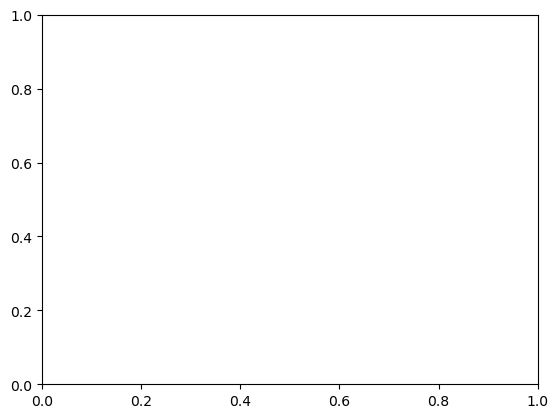

In [12]:
thetao['thetao'].isel(time=0,depth=0).plot(x="longitude", y="latitude", transform=" )

In [6]:
ls copernicus-data

 Indian_currents_Jan2020.nc  'Indian_currents_Jan2020_(1).nc'


In [8]:
indian_ds = xr.open_dataset('copernicus-data/Indian_currents_Jan2020.nc')

In [9]:
indian_ds

<xarray.Dataset> Size: 174MB
Dimensions:    (time: 5, depth: 15, latitude: 301, longitude: 481)
Coordinates:
  * depth      (depth) float32 60B 0.494 1.541 2.646 3.819 ... 21.6 25.21 29.44
  * latitude   (latitude) float32 1kB 0.0 0.08333 0.1667 ... 24.83 24.92 25.0
  * longitude  (longitude) float32 2kB 50.0 50.08 50.17 ... 89.83 89.92 90.0
  * time       (time) datetime64[ns] 40B 2020-01-01 2020-01-02 ... 2020-01-05
Data variables:
    uo         (time, depth, latitude, longitude) float64 87MB ...
    vo         (time, depth, latitude, longitude) float64 87MB ...
Attributes:
    institution:               MERCATOR OCEAN
    references:                http://www.mercator-ocean.fr
    history:                   2023/06/01 16:20:05 MERCATOR OCEAN Netcdf crea...
    Conventions:               CF-1.4
    title:                     daily mean fields from Global Ocean Physics An...
    source:                    MERCATOR GLORYS12V1
    comment:                   CMEMS product
    copernicusmarine_version:  2.2.1